# 1. Business Understanding

## 1.1 Background Information

Our company is entering the aviation sector to diversify its business operations.  Aircraft will be bought for both private and

commercial purposes.  Before purchasing any aircraft, safety and operational risks must be thoroughly evaluated because aviation

is a high-stakes sector. The company's leadership lacks specific understanding regarding which aircraft types are linked to

greater accidents and which are deemed safe.  Thorough analysis of previous aircraft accidents is examined to make data-driven

choices.

## 1.2 Objectives

This project's primary objectives are to:

i) Using data from past accidents, determine which aircraft have the least operating risk.

ii) Find patterns  that are associated with increased or decreased risk.

iii) Make data-driven suggestions to the company's leadership.

iv) Present results in a simplified presentation to executives.

## 1.3 Problem Statement

The company wants to buy airplanes but it doesn't know enough about the operational and safety hazards.  The company might

invest unreliable aircraft if it doesn't know which aircraft are more likely to be involved in accidents.

Consequently, we must conduct a thorough examination of aviation accident data in order to ascertain:

i) Which models and types of aircraft are most commonly involved in accidents?

ii) The seriousness of those accidents.

iii) Which airplanes are the most dependable and safest, making them good investments?

## 1.4 Metrics of Success

The following results and deliverables are anticipated for this project to be considered successful:

i) A list of aircraft models  ranked according to a risk score.

ii) Clear statistics and visualizations to back up the insights.

iii) Actionable suggestions that non-technical stakeholders can comprehend.

iv) An organized Jupyter notebook that includes:

   Code that is clear and reproducible.

   Data Analysis and Exploration.

   Business findings and suggestions

v) Slides that provides executive leadership with a summary of the findings.

# 2. Loading the dataset and getting information.

In [1]:
#importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
#Loading the dataset
df = pd.read_csv("AviationData.csv", encoding = 'latin-1', low_memory=False)

In [3]:
#displaying the first 5 rows
df.head()

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
0,20001218X45444,Accident,SEA87LA080,1948-10-24,"MOOSE CREEK, ID",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,UNK,Cruise,Probable Cause,NaN
1,20001218X45447,Accident,LAX94LA336,1962-07-19,"BRIDGEPORT, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,4.0,0.0,0.0,0.0,UNK,Unknown,Probable Cause,19-09-1996
2,20061025X01555,Accident,NYC07LA005,1974-08-30,"Saltville, VA",United States,36.922223,-81.878056,NaN,NaN,...,Personal,NaN,3.0,NaN,NaN,NaN,IMC,Cruise,Probable Cause,26-02-2007
3,20001218X45448,Accident,LAX96LA321,1977-06-19,"EUREKA, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,IMC,Cruise,Probable Cause,12-09-2000
4,20041105X01764,Accident,CHI79FA064,1979-08-02,"Canton, OH",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,1.0,2.0,NaN,0.0,VMC,Approach,Probable Cause,16-04-1980


In [4]:
#Number of rows and columns
df.shape

(88889, 31)

The dataset has 88889 rows and 31 columns.

In [5]:
#summary of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88889 entries, 0 to 88888
Data columns (total 31 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Event.Id                88889 non-null  object 
 1   Investigation.Type      88889 non-null  object 
 2   Accident.Number         88889 non-null  object 
 3   Event.Date              88889 non-null  object 
 4   Location                88837 non-null  object 
 5   Country                 88663 non-null  object 
 6   Latitude                34382 non-null  object 
 7   Longitude               34373 non-null  object 
 8   Airport.Code            50249 non-null  object 
 9   Airport.Name            52790 non-null  object 
 10  Injury.Severity         87889 non-null  object 
 11  Aircraft.damage         85695 non-null  object 
 12  Aircraft.Category       32287 non-null  object 
 13  Registration.Number     87572 non-null  object 
 14  Make                    88826 non-null

The dataset has 5 numerical columns and 26 categorical columns.

In [6]:
#statistical summary
df.describe().T # .T transponses output of df.describe

,count,mean,std,min,25%,50%,75%,max
Number.of.Engines,82805.0,1.146585,0.446510,0.0,1.0,1.0,1.0,8.0
Total.Fatal.Injuries,77488.0,0.647855,5.485960,0.0,0.0,0.0,0.0,349.0
Total.Serious.Injuries,76379.0,0.279881,1.544084,0.0,0.0,0.0,0.0,161.0
Total.Minor.Injuries,76956.0,0.357061,2.235625,0.0,0.0,0.0,0.0,380.0
Total.Uninjured,82977.0,5.325440,27.913634,0.0,0.0,1.0,2.0,699.0


In [7]:
#Describing categorical features
df.describe(include='object').T

,count,unique,top,freq
Event.Id,88889,87951,20001214X45071,3
Investigation.Type,88889,2,Accident,85015
Accident.Number,88889,88863,WPR23LA041,2
Event.Date,88889,14782,1984-06-30,25
Location,88837,27758,"ANCHORAGE, AK",434
Country,88663,219,United States,82248
Latitude,34382,25589,332739N,19
Longitude,34373,27154,0112457W,24
Airport.Code,50249,10375,NONE,1488
Airport.Name,52790,24871,Private,240


# 3. Data Understanding

In [8]:
#Creating a dataframe copy to be used in data cleaning
aviation_df = df.copy(deep=True)

In [9]:
#Checking column names
aviation_df.columns

Index(['Event.Id', 'Investigation.Type', 'Accident.Number', 'Event.Date',
       'Location', 'Country', 'Latitude', 'Longitude', 'Airport.Code',
       'Airport.Name', 'Injury.Severity', 'Aircraft.damage',
       'Aircraft.Category', 'Registration.Number', 'Make', 'Model',
       'Amateur.Built', 'Number.of.Engines', 'Engine.Type', 'FAR.Description',
       'Schedule', 'Purpose.of.flight', 'Air.carrier', 'Total.Fatal.Injuries',
       'Total.Serious.Injuries', 'Total.Minor.Injuries', 'Total.Uninjured',
       'Weather.Condition', 'Broad.phase.of.flight', 'Report.Status',
       'Publication.Date'],
      dtype='object')

In [10]:
#Checking the Event.Date column
aviation_df['Event.Date']

0        1948-10-24
1        1962-07-19
2        1974-08-30
3        1977-06-19
4        1979-08-02
            ...    
88884    2022-12-26
88885    2022-12-26
88886    2022-12-26
88887    2022-12-26
88888    2022-12-29
Name: Event.Date, Length: 88889, dtype: object

## 3.1 Checking the Missing Values and dealing with them

In [11]:
#Checking for missing values
df.isna().sum()

Event.Id                      0
Investigation.Type            0
Accident.Number               0
Event.Date                    0
Location                     52
Country                     226
Latitude                  54507
Longitude                 54516
Airport.Code              38640
Airport.Name              36099
Injury.Severity            1000
Aircraft.damage            3194
Aircraft.Category         56602
Registration.Number        1317
Make                         63
Model                        92
Amateur.Built               102
Number.of.Engines          6084
Engine.Type                7077
FAR.Description           56866
Schedule                  76307
Purpose.of.flight          6192
Air.carrier               72241
Total.Fatal.Injuries      11401
Total.Serious.Injuries    12510
Total.Minor.Injuries      11933
Total.Uninjured            5912
Weather.Condition          4492
Broad.phase.of.flight     27165
Report.Status              6381
Publication.Date          13771
dtype: i

In [12]:
#Dropping columns that will not be useful in my aircraft risk anlysis
aviation_df.drop(['Location', 'Country', 'Latitude', 'Longitude', 'Airport.Code', 'Airport.Name', 'Air.carrier', 'FAR.Description', 'Schedule', 'Publication.Date'], axis=1, inplace=True)

In [13]:
#Checking for unique in Injury Severity column
aviation_df['Injury.Severity'].unique()

array(['Fatal(2)', 'Fatal(4)', 'Fatal(3)', 'Fatal(1)', 'Non-Fatal',
       'Incident', 'Fatal(8)', 'Fatal(78)', 'Fatal(7)', 'Fatal(6)',
       'Fatal(5)', 'Fatal(153)', 'Fatal(12)', 'Fatal(14)', 'Fatal(23)',
       'Fatal(10)', 'Fatal(11)', 'Fatal(9)', 'Fatal(17)', 'Fatal(13)',
       'Fatal(29)', 'Fatal(70)', 'Unavailable', 'Fatal(135)', 'Fatal(31)',
       'Fatal(256)', 'Fatal(25)', 'Fatal(82)', 'Fatal(156)', 'Fatal(28)',
       'Fatal(18)', 'Fatal(43)', 'Fatal(15)', 'Fatal(270)', 'Fatal(144)',
       'Fatal(174)', 'Fatal(111)', 'Fatal(131)', 'Fatal(20)', 'Fatal(73)',
       'Fatal(27)', 'Fatal(34)', 'Fatal(87)', 'Fatal(30)', 'Fatal(16)',
       'Fatal(47)', 'Fatal(56)', 'Fatal(37)', 'Fatal(132)', 'Fatal(68)',
       'Fatal(54)', 'Fatal(52)', 'Fatal(65)', 'Fatal(72)', 'Fatal(160)',
       'Fatal(189)', 'Fatal(123)', 'Fatal(33)', 'Fatal(110)',
       'Fatal(230)', 'Fatal(97)', 'Fatal(349)', 'Fatal(125)', 'Fatal(35)',
       'Fatal(228)', 'Fatal(75)', 'Fatal(104)', 'Fatal(229)', 'Fatal

In [14]:
#Checking for value_counts in Injury Severity column
aviation_df['Injury.Severity'].value_counts()

Non-Fatal     67357
Fatal(1)       6167
Fatal          5262
Fatal(2)       3711
Incident       2219
              ...  
Fatal(199)        1
Fatal(64)         1
Fatal(33)         1
Fatal(68)         1
Fatal(270)        1
Name: Injury.Severity, Length: 109, dtype: int64

In [15]:
#Replacing values like 'Fatal(1)', 'Fatal(23)' with just 'Fatal' in the Injury Severity column
aviation_df['Injury.Severity'].replace(r'Fatal\(\d+\)', 'Fatal', regex=True, inplace=True)

In [16]:
#Checking for missing values in 'Injury.Severity' column
aviation_df['Injury.Severity'].isna().sum()

1000

In [17]:
#Filling any missing values in the 'Injury.Severity' column with 'Unknown'
aviation_df['Injury.Severity'].fillna('Unknown', inplace=True)

In [18]:
#Checking unique again
aviation_df['Injury.Severity'].unique()

array(['Fatal', 'Non-Fatal', 'Incident', 'Unavailable', 'Unknown',
       'Minor', 'Serious'], dtype=object)

In [19]:
#Replacing 'Minor' and 'Serious' with 'Non-Fatal' and 'Unavailable' with 'Unknown' in 'Injury.Severity' column
aviation_df['Injury.Severity'].replace({'Minor':'Non-Fatal', 'Serious':'Non-Fatal', 'Unavailable':'Unknown'}, inplace=True)

In [20]:
#Checking for unique again in 'Injurity.Severity' column
aviation_df['Injury.Severity'].unique()

array(['Fatal', 'Non-Fatal', 'Incident', 'Unknown'], dtype=object)

In [21]:
#Checking for unique  in 'Aircraft.damage' column
aviation_df['Aircraft.damage'].unique()

array(['Destroyed', 'Substantial', 'Minor', nan, 'Unknown'], dtype=object)

In [22]:
#Filling missing values in 'Aircraft.damage' with 'Unknown'
aviation_df['Aircraft.damage'].fillna('Unknown', inplace=True)

In [23]:
#Checking for unique again  in 'Aircraft.damage' column
aviation_df['Aircraft.damage'].unique()

array(['Destroyed', 'Substantial', 'Minor', 'Unknown'], dtype=object)

In [24]:
#Checking for unique  in 'Aircraft.category' column
aviation_df['Aircraft.Category'].unique()

array([nan, 'Airplane', 'Helicopter', 'Glider', 'Balloon', 'Gyrocraft',
       'Ultralight', 'Unknown', 'Blimp', 'Powered-Lift', 'Weight-Shift',
       'Powered Parachute', 'Rocket', 'WSFT', 'UNK', 'ULTR'], dtype=object)

In [25]:
#Filling missing values in 'Aircraft.category' with 'Unknown'
aviation_df['Aircraft.Category'].fillna('Unknown', inplace=True)

In [26]:
#Replacing 'WSFT' with 'Weight-Shift', 'UNK' with 'Unknown' and 'ULTR' with 'Ultralight'
aviation_df['Aircraft.Category'].replace({'WSFT': 'Weight-Shift', 'UNK': 'Unknown', 'ULTR': 'Ultralight'}, inplace=True)

In [27]:
#Checking for unique again in 'Aircraft.category' column
aviation_df['Aircraft.Category'].unique()

array(['Unknown', 'Airplane', 'Helicopter', 'Glider', 'Balloon',
       'Gyrocraft', 'Ultralight', 'Blimp', 'Powered-Lift', 'Weight-Shift',
       'Powered Parachute', 'Rocket'], dtype=object)

In [28]:
#Checking for unique in 'Registration.Number' column
aviation_df['Registration.Number'].unique()

array(['NC6404', 'N5069P', 'N5142R', ..., 'N749PJ', 'N210CU', 'N9026P'],
      dtype=object)

In [29]:
#Checking for value_counts in 'Registration.Number' column
aviation_df['Registration.Number'].value_counts().head(15)

NONE       344
UNREG      126
None        65
UNK         13
USAF         9
N20752       8
unknown      6
N11VH        6
N5408Y       6
N8402K       6
N121CC       6
N53893       6
N4101E       6
N9957J       5
N8597D       5
Name: Registration.Number, dtype: int64

In [30]:
#Replacing 'NONE' with 'Unknown', 'UNK' with 'Unknown', 
#'UNREG' with 'Unknown' , 'unknown' with 'Unknown' 'None' with 'Unknown' in 'Registrtion.Number' column
aviation_df['Registration.Number'].replace({'NONE': 'Unknown', 'UNK': 'Unknown', 'UNREG': 'Unknown', 'unknown': 'Unknown', 'None': 'Unknown'}, inplace=True)

In [31]:
#Checking value_counts  again in 'Registration.Number' column
aviation_df['Registration.Number'].value_counts().head(15)

Unknown    557
USAF         9
N20752       8
N53893       6
N8402K       6
N5408Y       6
N11VH        6
N4101E       6
N121CC       6
N8653Y       5
N75LE        5
N9957J       5
N3331R       5
N32133       5
N93067       5
Name: Registration.Number, dtype: int64

In [32]:
#Checking for missing values in 'Registration.Number' column
aviation_df['Registration.Number'].isna().sum()

1317

In [33]:
#Filling missing values in 'Registration.Number' column with 'Unknown'
aviation_df['Registration.Number'].fillna('Unknown', inplace=True)

In [34]:
#Checking for unique in 'Make' column
aviation_df['Make'].unique()

array(['Stinson', 'Piper', 'Cessna', ..., 'JAMES R DERNOVSEK',
       'ORLICAN S R O', 'ROYSE RALPH L'], dtype=object)

In [35]:
#Checking for value_counts in 'Make' column
aviation_df['Make'].value_counts()

Cessna              22227
Piper               12029
CESSNA               4922
Beech                4330
PIPER                2841
                    ...  
Bowermaster             1
RIVERS WILLIAM J        1
Stroud                  1
Pascucci                1
NICKEL                  1
Name: Make, Length: 8237, dtype: int64

In [36]:
#Standardizing all values in 'Make' to title case
aviation_df['Make'] = aviation_df['Make'].str.title()

In [37]:
#Checking for value_counts again in 'Make' column
aviation_df['Make'].value_counts().head(20)

Cessna               27149
Piper                14870
Beech                 5372
Boeing                2745
Bell                  2722
Mooney                1334
Robinson              1230
Grumman               1172
Bellanca              1045
Hughes                 932
Schweizer              773
Air Tractor            691
Aeronca                636
Mcdonnell Douglas      608
Maule                  589
Champion               519
Stinson                439
Aero Commander         429
De Havilland           422
Luscombe               414
Name: Make, dtype: int64

In [38]:
#Checking for missing values in 'Make' column
aviation_df['Make'].isna().sum()

63

In [39]:
#Filling missing values in 'Make' with 'Unknown'
aviation_df['Make'].fillna('Unknown', inplace=True)

In [40]:
#Checking for unique in 'Model' column
aviation_df['Model'].unique()

array(['108-3', 'PA24-180', '172M', ..., 'ROTORWAY EXEC 162-F',
       'KITFOX S5', 'M-8 EAGLE'], dtype=object)

In [41]:
#Checking for value_counts in 'Model' column
aviation_df['Model'].value_counts().head(20)

152          2367
172          1756
172N         1164
PA-28-140     932
150           829
172M          798
172P          689
182           659
180           622
150M          585
PA-18         581
PA-18-150     578
PA-28-180     572
PA-28-161     569
PA-28-181     532
206B          524
737           489
PA-38-112     469
150L          461
G-164A        460
Name: Model, dtype: int64

In [42]:
#Checking for missing values in 'Model' column
aviation_df['Model'].isna().sum()

92

In [43]:
#Filling missing values in 'Model' with 'Unknown'
aviation_df['Model'].fillna('Unknown', inplace=True)

In [44]:
#Checking for unique in 'Amateur.Built' column
aviation_df['Amateur.Built'].unique()

array(['No', 'Yes', nan], dtype=object)

In [45]:
#Filling missing values in 'Amateur.Built' column with 'Unknown'
aviation_df['Amateur.Built'].fillna('Unknown', inplace=True)

In [46]:
#Checking for unique in 'Engine.Type' column
aviation_df['Engine.Type'].unique()

array(['Reciprocating', nan, 'Turbo Fan', 'Turbo Shaft', 'Unknown',
       'Turbo Prop', 'Turbo Jet', 'None', 'Electric', 'Hybrid Rocket',
       'Geared Turbofan', 'LR', 'NONE', 'UNK'], dtype=object)

In [47]:
#Checking for value_ccounts in 'Engine.Type' column
aviation_df['Engine.Type'].value_counts()

Reciprocating      69530
Turbo Shaft         3609
Turbo Prop          3391
Turbo Fan           2481
Unknown             2051
Turbo Jet            703
None                  19
Geared Turbofan       12
Electric              10
NONE                   2
LR                     2
UNK                    1
Hybrid Rocket          1
Name: Engine.Type, dtype: int64

In [48]:
#Filling missing values in 'Engine.Type' with 'Unknown'
aviation_df['Engine.Type'].fillna('Unknown', inplace=True)

In [49]:
#Replacing 'NONE' with 'Unknown', 'UNK' with 'Unknown' and 'None' with 'Unknown' in 'Registrtion.Number'
aviation_df['Engine.Type'].replace({'NONE': 'Unknown', 'UNK': 'Unknown', 'None': 'Unknown', 'LR': 'Other'}, inplace=True)

In [50]:
#Checking for unique again in 'Engine.Type' column
aviation_df['Engine.Type'].unique()

array(['Reciprocating', 'Unknown', 'Turbo Fan', 'Turbo Shaft',
       'Turbo Prop', 'Turbo Jet', 'Electric', 'Hybrid Rocket',
       'Geared Turbofan', 'Other'], dtype=object)

In [51]:
#Checking for unique in 'Purpose.of.flight' column
aviation_df['Purpose.of.flight'].unique()

array(['Personal', nan, 'Business', 'Instructional', 'Unknown', 'Ferry',
       'Executive/corporate', 'Aerial Observation', 'Aerial Application',
       'Public Aircraft', 'Skydiving', 'Other Work Use', 'Positioning',
       'Flight Test', 'Air Race/show', 'Air Drop',
       'Public Aircraft - Federal', 'Glider Tow',
       'Public Aircraft - Local', 'External Load',
       'Public Aircraft - State', 'Banner Tow', 'Firefighting',
       'Air Race show', 'PUBS', 'ASHO', 'PUBL'], dtype=object)

In [52]:
#Filling missing values in 'Purpose.of.flight' with 'Unknown'
aviation_df['Purpose.of.flight'].fillna('Unknown', inplace=True)

In [53]:
#Replacing 'Public AirCraft - Federal' with 'Public Aircraft',
#'Public Aircraft - Local' with 'Public Aircraft', 'Public Aircraft - State' with 'Public Aircraft', 
#'PUBS' with 'Public Aircraft' , 'ASHO' with 'Air Race/show' 'PUBL' with 'Public Aircraft' in 'Purpose.of.flight' column
aviation_df['Purpose.of.flight'].replace({'Public Aircraft - Federal': 'Public Aircraft', 'Public Aircraft - Local': 'Public Aircraft', 'Public Aircraft - State': 'Public Aircraft', 'PUBS': 'Public Aircraft', 'PUBL': 'Public Aircraft', 'ASHO' : 'Air Race/show'}, inplace=True)

In [54]:
#Checking for unique again 'Purpose.of.flight' column
aviation_df['Purpose.of.flight'].unique()

array(['Personal', 'Unknown', 'Business', 'Instructional', 'Ferry',
       'Executive/corporate', 'Aerial Observation', 'Aerial Application',
       'Public Aircraft', 'Skydiving', 'Other Work Use', 'Positioning',
       'Flight Test', 'Air Race/show', 'Air Drop', 'Glider Tow',
       'External Load', 'Banner Tow', 'Firefighting', 'Air Race show'],
      dtype=object)

In [55]:
#Checking for unique in 'Weather.Condition' column
aviation_df['Weather.Condition'].unique()

array(['UNK', 'IMC', 'VMC', nan, 'Unk'], dtype=object)

In [56]:
#Filling missing values in 'Weather.Condition' with 'Unknown'
aviation_df['Weather.Condition'].fillna('Unknown', inplace=True)

In [57]:
#Checking for value_counts in 'Weather.Condition' column
aviation_df['Weather.Condition'].value_counts()

VMC        77303
IMC         5976
Unknown     4492
UNK          856
Unk          262
Name: Weather.Condition, dtype: int64

In [58]:
#Replacing 'UNK' with 'Unknown' in 'Weather.Condition' column
aviation_df['Weather.Condition'].replace({'UNK' : 'Unknown', 'Unk': 'Unknown'}, inplace=True)

In [59]:
#Checking value_counts again in 'Weather.Condition' column
aviation_df['Weather.Condition'].value_counts()

VMC        77303
IMC         5976
Unknown     5610
Name: Weather.Condition, dtype: int64

In [60]:
#Checking unique in 'Broad.phase.of.flight' column
aviation_df['Broad.phase.of.flight'].unique()

array(['Cruise', 'Unknown', 'Approach', 'Climb', 'Takeoff', 'Landing',
       'Taxi', 'Descent', 'Maneuvering', 'Standing', 'Go-around', 'Other',
       nan], dtype=object)

In [61]:
#Filling missing values in 'Broad.phase.of.flight' with unknown
aviation_df['Broad.phase.of.flight'].fillna('Unknown', inplace=True)

In [62]:
#Checking unique again 'Broad.phase.of.flight' column
aviation_df['Broad.phase.of.flight'].unique()

array(['Cruise', 'Unknown', 'Approach', 'Climb', 'Takeoff', 'Landing',
       'Taxi', 'Descent', 'Maneuvering', 'Standing', 'Go-around', 'Other'],
      dtype=object)

In [63]:
#Checking missing values in 'Report.Status' column
aviation_df['Report.Status'].isna().sum()

6381

In [64]:
#Filling missing values in 'Report.Status' with unknown
aviation_df['Report.Status'].fillna('Unknown', inplace=True)

In [65]:
#Checking unique in 'Number.of.Engines' column
aviation_df['Number.of.Engines'].unique()

array([ 1., nan,  2.,  0.,  3.,  4.,  8.,  6.])

In [66]:
#Checking value_counts in 'Number.of.Engines' column
aviation_df['Number.of.Engines'].value_counts()

1.0    69582
2.0    11079
0.0     1226
3.0      483
4.0      431
8.0        3
6.0        1
Name: Number.of.Engines, dtype: int64

In [67]:
#Checking missing values percentage in 'Number.of.Engines' column
aviation_df['Number.of.Engines'].isna().mean()*100

6.844491444385695

In [68]:
#Dropping rows with Unknown in Engine Type
aviation_df.drop(aviation_df[aviation_df['Engine.Type'] == 'Unknown'].index, axis=0, inplace=True )

In [69]:
#Filling missing values in 'Number.of.Engine' column based on the most common for the aircraft's 'Engine.Type'
aviation_df['Number.of.Engines'] = aviation_df['Number.of.Engines'].fillna(aviation_df.groupby('Engine.Type')['Number.of.Engines'].transform(lambda x: x.mode().iloc[0]))



In [70]:
#Checking value_counts in 'Number.of.Engines' column
aviation_df['Number.of.Engines'].value_counts()

1.0    68223
2.0    10653
3.0      467
4.0      391
8.0        3
0.0        2
Name: Number.of.Engines, dtype: int64

In [71]:
#Removing Unrealistic Number.of.Engines, Keeping the realistic
aviation_df = aviation_df[aviation_df['Number.of.Engines'].isin([1, 2, 3, 4])]

In [72]:
#Checking value_counts again in 'Number.of.Engines' column
aviation_df['Number.of.Engines'].value_counts()

1.0    68223
2.0    10653
3.0      467
4.0      391
Name: Number.of.Engines, dtype: int64

In [73]:
#Checking missing values in 'Number.of.Engines again'
aviation_df['Number.of.Engines'].isna().sum()

0

In [74]:
#Checking unique in 'Total.Fatal.Injuries' column
aviation_df['Total.Fatal.Injuries'].unique()

array([  2.,   4.,   3.,  nan,   0.,   1.,   8.,  78.,   7.,   6.,   5.,
       153.,  12.,  14.,  23.,  10.,  11.,   9.,  17.,  13.,  29.,  70.,
       135.,  31., 256.,  25.,  82., 156.,  28.,  18.,  43.,  15., 270.,
       144., 174., 111., 131.,  20.,  73.,  27.,  34.,  30.,  16.,  37.,
       132.,  68., 123., 110., 230., 228., 217.,  88.,  19.,  60.,  65.,
        92., 265.,  21., 107., 113.,  49.,  24., 103., 157.,  42.,  44.,
        66., 112.])

In [75]:
#Checking missing values in 'Total.Fatal.Injuries' column
aviation_df['Total.Fatal.Injuries'].isna().sum()

10378

In [76]:
#Checking missing values in Total.Fatal.Injuries with 'Injury.Severity'
aviation_df[aviation_df['Total.Fatal.Injuries'].isna()]['Injury.Severity'].head(20)


5       Non-Fatal
89      Non-Fatal
260     Non-Fatal
351      Incident
728     Non-Fatal
732     Non-Fatal
761     Non-Fatal
801     Non-Fatal
973     Non-Fatal
1164     Incident
1174    Non-Fatal
1298    Non-Fatal
1309    Non-Fatal
1329    Non-Fatal
1563    Non-Fatal
1605    Non-Fatal
1834     Incident
1970    Non-Fatal
1974    Non-Fatal
2174    Non-Fatal
Name: Injury.Severity, dtype: object

In [77]:
#Filling missing values with 0 in 'Total.Fatal.Injuries' where 'Injury.Severity' is Non-Fatal
aviation_df.loc[(aviation_df['Total.Fatal.Injuries'].isna()) &(aviation_df['Injury.Severity'].isin(['Non-Fatal', 'Incident'])), 'Total.Fatal.Injuries'] = 0


In [78]:
#Dropping rows where 'Total.Fatal.Injuries' is still missing
aviation_df.dropna(subset=['Total.Fatal.Injuries'], inplace=True)

In [79]:
#Checking missing values in 'Total.Serious.Injuries' column
aviation_df['Total.Serious.Injuries'].isna().sum()

11209

In [80]:
#Checking missing values in Total.Serious.Injuries with 'Injury.Severity'
aviation_df[aviation_df['Total.Serious.Injuries'].isna()]['Injury.Severity'].head(20)


2           Fatal
5       Non-Fatal
89      Non-Fatal
260     Non-Fatal
293         Fatal
351      Incident
446         Fatal
593         Fatal
728     Non-Fatal
732     Non-Fatal
801     Non-Fatal
973     Non-Fatal
1164     Incident
1174    Non-Fatal
1298    Non-Fatal
1309    Non-Fatal
1329    Non-Fatal
1563    Non-Fatal
1605    Non-Fatal
1834     Incident
Name: Injury.Severity, dtype: object

In [81]:
#Filling missing values with 0 in 'Total.Serious.Injuries' where 'Injury.Severity' is Non-Fatal
aviation_df.loc[(aviation_df['Total.Serious.Injuries'].isna()) &(aviation_df['Injury.Severity'].isin(['Non-Fatal', 'Incident'])), 'Total.Serious.Injuries'] = 0


In [82]:
#Dropping rows where 'Total.Serious.Injuries' is still missing
aviation_df.dropna(subset=['Total.Serious.Injuries'], inplace=True)

In [83]:
#Checking missing values in 'Total.Minor.Injuries' column
aviation_df['Total.Minor.Injuries'].isna().sum()

8432

In [84]:
#Checking missing values in Total.Minor.Injuries with 'Injury.Severity'
aviation_df[aviation_df['Total.Minor.Injuries'].isna()]['Injury.Severity'].head(20)


89      Non-Fatal
260     Non-Fatal
351      Incident
728     Non-Fatal
732     Non-Fatal
761     Non-Fatal
801     Non-Fatal
973     Non-Fatal
1164     Incident
1298    Non-Fatal
1309    Non-Fatal
1329    Non-Fatal
1563    Non-Fatal
1605    Non-Fatal
1834     Incident
2099        Fatal
2174    Non-Fatal
2558    Non-Fatal
2831     Incident
3183    Non-Fatal
Name: Injury.Severity, dtype: object

In [85]:
#Filling missing values with 0 in 'Total.Minor.Injuries' where 'Injury.Severity' is Non-Fatal
aviation_df.loc[(aviation_df['Total.Minor.Injuries'].isna()) &(aviation_df['Injury.Severity'].isin(['Non-Fatal', 'Incident'])), 'Total.Minor.Injuries'] = 0


In [86]:
#Dropping rows where 'Total.Minor.Injuries' is still missing
aviation_df.dropna(subset=['Total.Minor.Injuries'], inplace=True)

In [87]:
#Checking missing values in 'Total.Uninjured' column
aviation_df['Total.Uninjured'].isna().sum()

2565

In [88]:
#Filling'Total.Uninjured' column
aviation_df['Total.Uninjured'].fillna(0, inplace=True)

In [89]:
#Checking missing values again in 'Total.Uninjured' column
aviation_df['Total.Uninjured'].isna().sum()

0

In [90]:
#Checking null values
aviation_df.isna().sum()

Event.Id                  0
Investigation.Type        0
Accident.Number           0
Event.Date                0
Injury.Severity           0
Aircraft.damage           0
Aircraft.Category         0
Registration.Number       0
Make                      0
Model                     0
Amateur.Built             0
Number.of.Engines         0
Engine.Type               0
Purpose.of.flight         0
Total.Fatal.Injuries      0
Total.Serious.Injuries    0
Total.Minor.Injuries      0
Total.Uninjured           0
Weather.Condition         0
Broad.phase.of.flight     0
Report.Status             0
dtype: int64

In [91]:
#Removing Unknown in columns
aviation_df = aviation_df[~(aviation_df[['Engine.Type', 'Injury.Severity', 'Aircraft.damage', 'Purpose.of.flight', 'Make', 'Model', 'Amateur.Built' ]] == 'Unknown').any(axis=1)]


## 3.2 Checking for duplicate

In [92]:
#Duplicates in rows
aviation_df.duplicated().sum()

0

In [93]:
#Duplicates in columns
aviation_df.columns.duplicated().sum()

0

In [94]:
aviation_df.to_csv('aviation_data_cleaned.csv', index=False)


# 4. Exploratory Data Analysis

## 4.1 Univariate Analysis

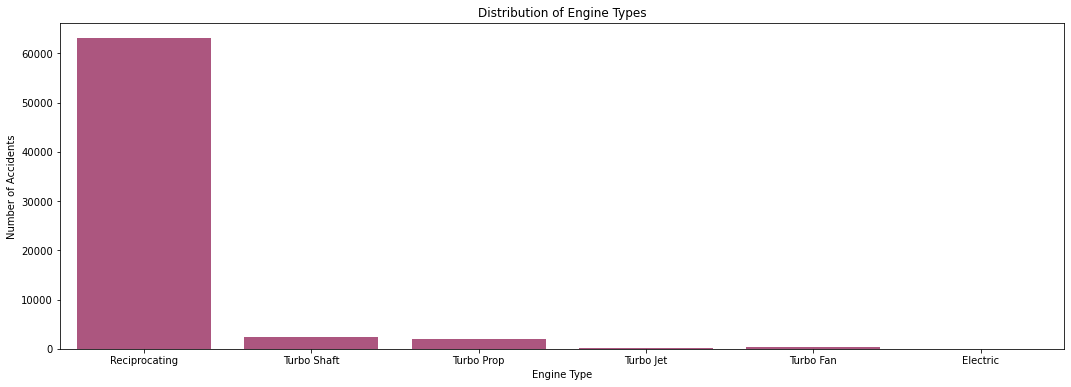

In [95]:
# Plotting Engine Type Count
plt.figure(figsize=(18, 6))
sns.countplot(data=aviation_df, x='Engine.Type', color='#BA487F')
#Customizing axes
plt.xlabel("Engine Type")
plt.ylabel("Number of Accidents")
plt.title("Distribution of Engine Types")
plt.show()


## Observation
Reciprocating engines found in small aircrafts are th most suggesting that small aircraft are the most likely to be involved in

accidents. 
 
Turbo fans and turbo jets are involved in fewer incidents. 

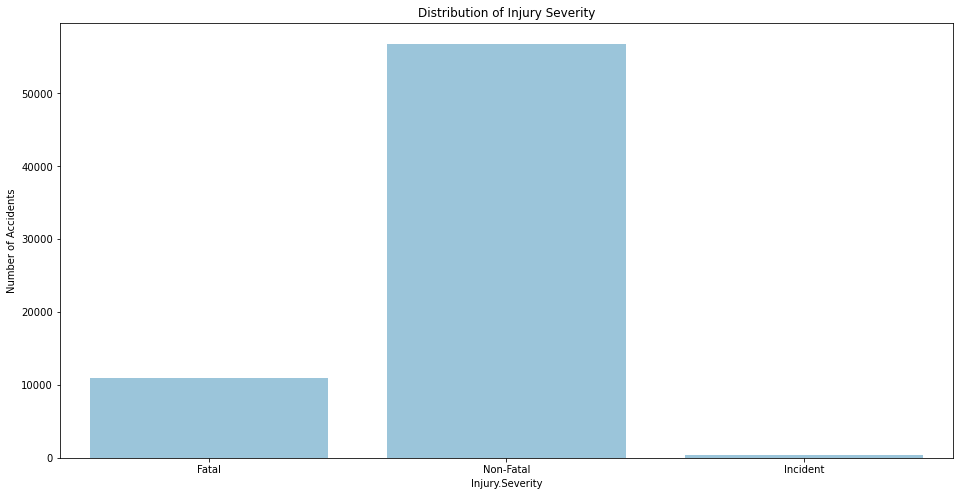

In [96]:
# Plotting Injury Severity Count
plt.figure(figsize=(16, 8))
sns.countplot(data=aviation_df, x='Injury.Severity', color='#91C8E4')
#Customizing axes
plt.xlabel("Injury.Severity")
plt.ylabel("Number of Accidents")
plt.title("Distribution of Injury Severity")
plt.show()

### Observation
Most aviation accidents are non-fatal. A significant portion of the accidents are fatal.

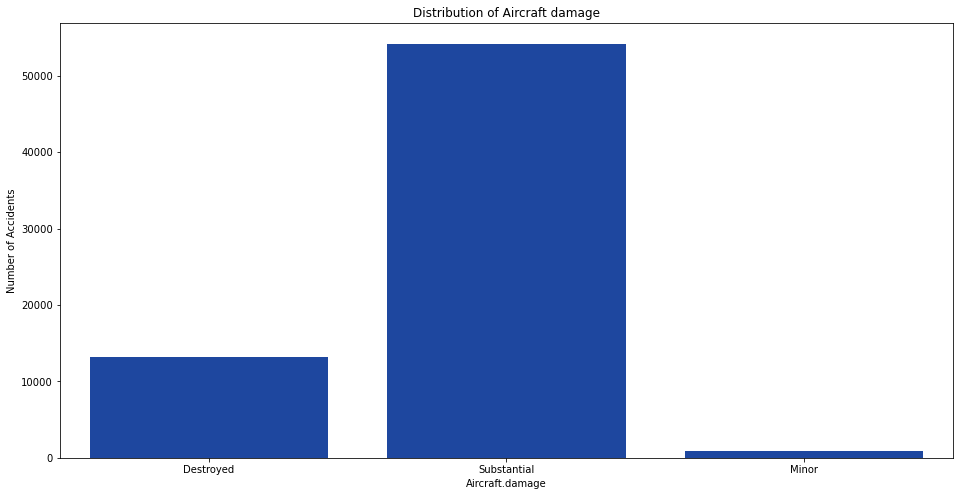

In [97]:
# Plotting Aircraft damage Count
plt.figure(figsize=(16, 8))
sns.countplot(data=aviation_df, x='Aircraft.damage', color='#093FB4')
#Customizing axes
plt.xlabel("Aircraft.damage")
plt.ylabel("Number of Accidents")
plt.title("Distribution of Aircraft damage")
plt.show()

### Observation

Substantial is the most common outcome. This means most aircraft get major structural damage but not total loss.

Repairable but the damage is serious enough to affect airworthiness. 

A substantial portion are Destroyed meaning the aircrafts are damaged beyond repair.

Very few aircrafts get minor damages suggesting that even small accidents result in serious damages.


   ## 4.2 Bivariate Analysis

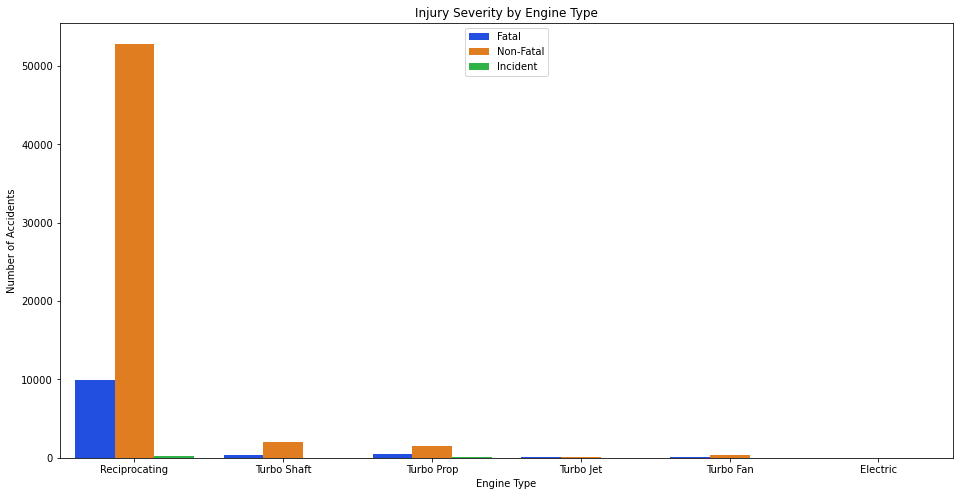

In [103]:
#Plotting Engine Type vs Injury Severity
plt.figure(figsize=(16, 8))
sns.countplot(data=aviation_df, x='Engine.Type', hue='Injury.Severity', palette= 'bright')
#Cusomiing axes
plt.xlabel("Engine Type")
plt.ylabel("Number of Accidents")
plt.title("Injury Severity by Engine Type")
plt.legend(loc='upper center')
plt.show()


### Observation
Reciprocating engine type have the most accidents that result in fatalities.

Turbo Shaft which are found in helicopters have fewer accidents.

Turbo Props found in older airplanes have very high fatalities than Turbo Shaft thus carry a higher risk.


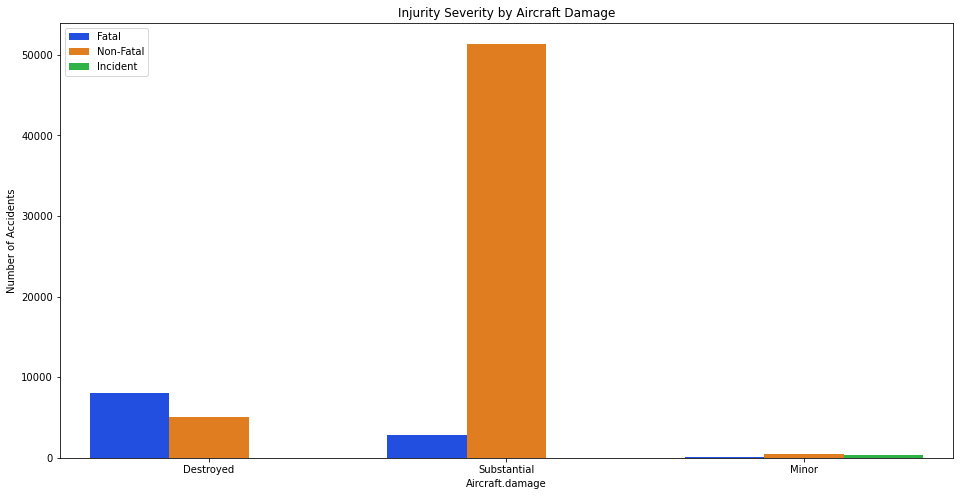

In [104]:
#Plotting 'Aircraft damage' vs 'Injury Severity'
plt.figure(figsize=(16, 8))
sns.countplot(data=aviation_df, x='Aircraft.damage', hue='Injury.Severity', palette= 'bright')
#Cusomiing axes
plt.xlabel("Aircraft.damage")
plt.ylabel("Number of Accidents")
plt.title("Injurity Severity by Aircraft Damage")
plt.legend(loc='upper left')
plt.show()


### Observation
Substantial	is the most frequent which means serious damage but people survive, the number of non-fatal is very high.

There is a lot of fatalities indicating deaths still occur even when the plane is not totally damaged.

Destroyed where the plane is damaged beyond repair has fatalities close to 10000 very high. This means there is a

strong link between the two. However, there are planes that are destroyed but still have individuals who survive.

Minor damages are rare and have almost zero fatalities. 



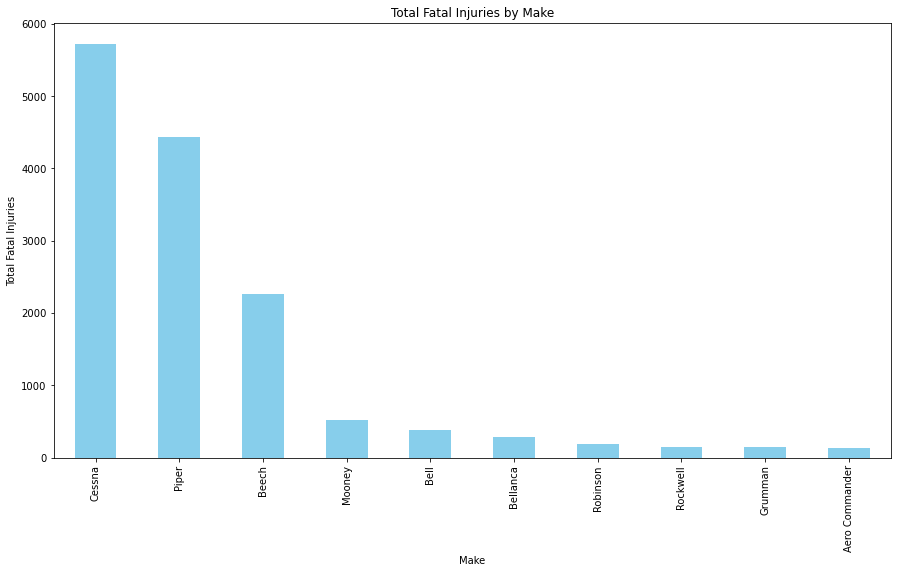

In [105]:
# Grouping and getting top 10 makes by total fatal injuries
top_fatal = aviation_df.groupby('Make')['Total.Fatal.Injuries'].sum().sort_values(ascending=False).head(10)
# Plotting
top_fatal.plot(kind='bar', figsize=(15,8), color='skyblue')
plt.title('Total Fatal Injuries by Make')
plt.xlabel('Make')
plt.ylabel('Total Fatal Injuries')
plt.show()


### Observation
Cessna, Piper and Beech have high fatalities because they are most commonly flown small aircrafts.

Therefore they have more flights thus more chances of accidents and fatalities overall.



## 4.3 MultiVariate Analysis

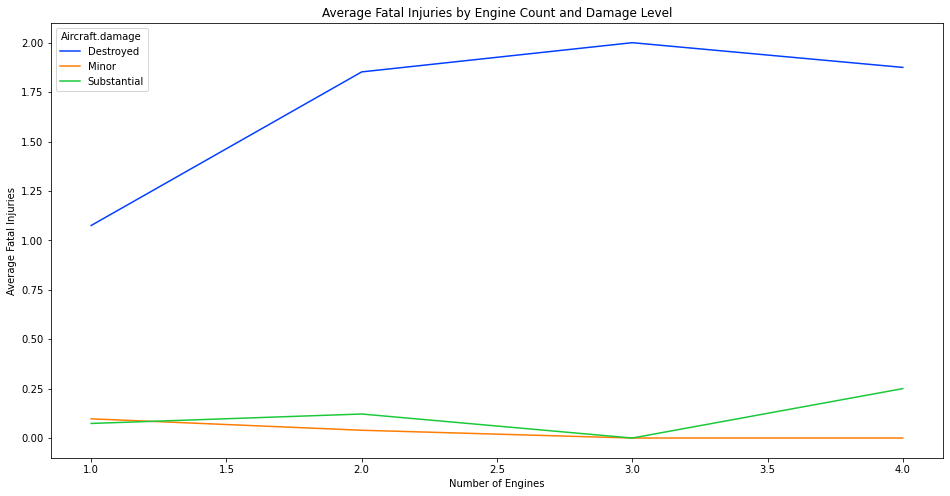

In [101]:
#Grouping
grouped_df = aviation_df.groupby(['Number.of.Engines', 'Aircraft.damage'])['Total.Fatal.Injuries'].mean().reset_index()
#Plotting
plt.figure(figsize=(16, 8))
sns.lineplot(data=grouped_df, x='Number.of.Engines', y='Total.Fatal.Injuries', hue='Aircraft.damage', palette='bright')
#Customizing axes
plt.title("Average Fatal Injuries by Engine Count and Damage Level")
plt.xlabel("Number of Engines")
plt.ylabel("Average Fatal Injuries")
plt.show()


### Observation
Aircraft that are destroyed during accidents have the highest average fatal injuries especially those with 2 to 3 engines.

Substantial and minor damages have very low fatality averages. This means that the extent of aircraft damage is a strong

predictor of injury severity. 

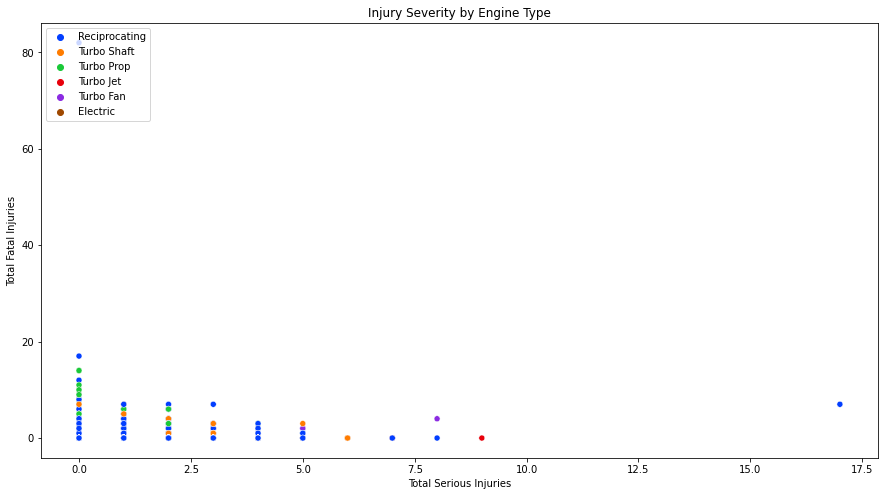

In [102]:
#Plotting 
plt.figure(figsize=(15, 8))
sns.scatterplot(data=aviation_df, x='Total.Serious.Injuries', y='Total.Fatal.Injuries', hue='Engine.Type',palette='bright')
#Customizing axes
plt.title("Injury Severity by Engine Type")
plt.xlabel("Total Serious Injuries")
plt.ylabel("Total Fatal Injuries")
plt.legend(loc='upper left')
plt.show()

### Observation
A majority of data points are clustered near zero indicating most aircraft accidents result in few injuries. Accidents that

result in high number of injuries are rare. Reciprocating engines are very common with low to moderate injuries. Other engine

types appear sparsely meaning they are fewer.

### Recommendations

1. Avoid engines with high risks such as reciprocating and single-engine aircraft.

2. Prioritize aircraft with lower fatalities and injuries based on make and engine type. 

3. Choose aircraft with high survivability rating in past crash reports.